In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as pt
import scipy.stats

%pylab inline
#significance level 0.05

#H0: A Normal and Logistic distributions don't fit the age distribution of citibike riders.
#Ha: A Normal and Logistics distributions do fit the age distribution of citibike riders. 

Populating the interactive namespace from numpy and matplotlib


In [2]:
if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

In [3]:
!curl -O 'https://s3.amazonaws.com/tripdata/201512-citibike-tripdata.zip'

In [4]:
!unzip 201512-citibike-tripdata.zip

In [5]:
df = pd.read_csv('201512-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,475,12/1/2015 07:35:36,12/1/2015 07:43:32,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760647,-73.984427,22780,Subscriber,1983.0,1
1,684,12/1/2015 07:38:15,12/1/2015 07:49:39,72,W 52 St & 11 Ave,40.767272,-73.993929,520,W 52 St & 5 Ave,40.759923,-73.976485,17787,Subscriber,1975.0,1
2,1063,12/1/2015 07:44:49,12/1/2015 08:02:33,72,W 52 St & 11 Ave,40.767272,-73.993929,358,Christopher St & Greenwich St,40.732916,-74.007114,18797,Subscriber,1966.0,1
3,1075,12/1/2015 08:02:29,12/1/2015 08:20:24,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,14625,Subscriber,1985.0,1
4,293,12/1/2015 08:06:37,12/1/2015 08:11:30,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,21238,Subscriber,1968.0,1


In [7]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [20]:
df.dropna(inplace=True)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,475,12/1/2015 07:35:36,12/1/2015 07:43:32,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760647,-73.984427,22780,Subscriber,1983.0,1
1,684,12/1/2015 07:38:15,12/1/2015 07:49:39,72,W 52 St & 11 Ave,40.767272,-73.993929,520,W 52 St & 5 Ave,40.759923,-73.976485,17787,Subscriber,1975.0,1
2,1063,12/1/2015 07:44:49,12/1/2015 08:02:33,72,W 52 St & 11 Ave,40.767272,-73.993929,358,Christopher St & Greenwich St,40.732916,-74.007114,18797,Subscriber,1966.0,1
3,1075,12/1/2015 08:02:29,12/1/2015 08:20:24,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,14625,Subscriber,1985.0,1
4,293,12/1/2015 08:06:37,12/1/2015 08:11:30,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,21238,Subscriber,1968.0,1


In [21]:
df['birth year'].head()

0    1983.0
1    1975.0
2    1966.0
3    1985.0
4    1968.0
Name: birth year, dtype: float64

In [46]:
df = df[df['birth year'] > 1940]

In [47]:
mean = numpy.mean(df['birth year'])

In [48]:
print (mean)

1976.37065786


In [49]:
std = numpy.std(df['birth year'])

In [50]:
print (std)

11.6285334128


In [51]:
test = scipy.stats.kstest(df['birth year'],'norm',args= [mean, std])

In [52]:
print (test)

KstestResult(statistic=0.10008430090418052, pvalue=0.0)


In [ ]:
#H0 rejected due to pvalue is 0.0

---

In [53]:
test_2 = scipy.stats.anderson(df['birth year'], 'norm')

In [54]:
print (test_2)

AndersonResult(statistic=9281.4353490893263, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


---

In [55]:
test3 = scipy.stats.kstest(df['birth year'],'logistic',args= [mean, std])

In [56]:
print (test3)

KstestResult(statistic=0.17094267391665108, pvalue=0.0)


In [ ]:
#H0 rejected due to pvalue is 0.0

In [57]:
test_4 = scipy.stats.anderson(df['birth year'], 'logistic')

In [58]:
print (test_4)

AndersonResult(statistic=9171.2068433499662, critical_values=array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))


---

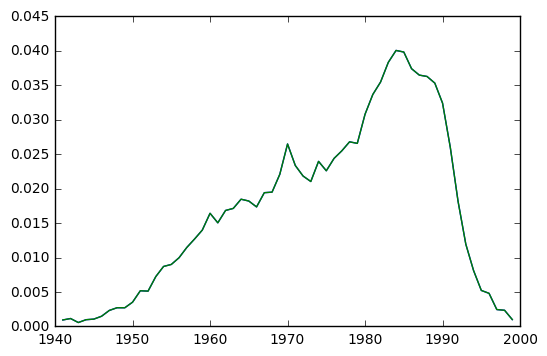

In [67]:
from collections import Counter 
Counter(df['birth year'])

df1 = pd.DataFrame(Counter(df['birth year']), index = ('birth year', 'number')).T
percentage = df1 / len(df['birth year'])

pl.plot(percentage)

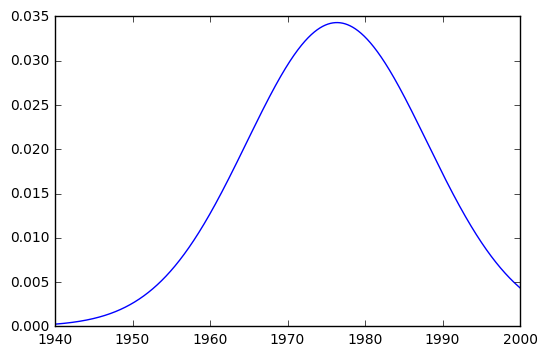

In [77]:
from scipy.stats import norm

x = np.linspace(1940,2000,30000)
y = norm.pdf(x, loc = mean, scale = std)
pl.plot(x,y)

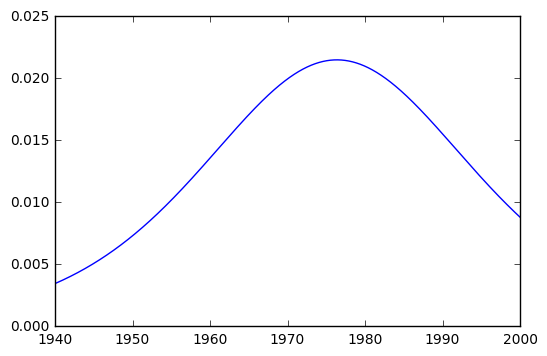

In [78]:
from scipy.stats import logistic
x1 = np.linspace(1940,2000,30000)
y1 = logistic.pdf(x1, loc = mean, scale = std)
pl.plot(x1, y1)

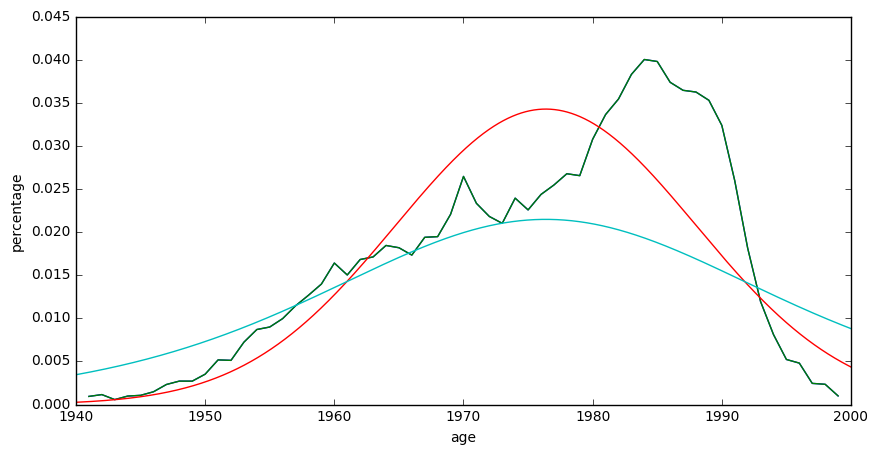

In [81]:
pl.figure(figsize=(10,5))
pl.plot(percentage)
pl.plot(x,y)
pl.plot(x1,y1)
pl.xlabel('age')
pl.ylabel('percentage')